## Tensorflow
A Python-based machine learning platform developed by Google.

*   Can automatically compute the gradient of any differentiable expression.
*   Not only run on CPUs, but also on GPUs and TPUs (highly parallel hard- accelerators.


## Keras
A deep learning API for Python, built on top of Tensorflow.
*  Provides a convenient way to define and train any kind of deep learning model.

Note: Workspace in deeplearning is recommended to run on GPU as it is much faster than CPU.

In [1]:
import tensorflow as tf
x = tf.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape = (2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal(shape = (3, 1), mean = 0., stddev = 1)
print(x)

tf.Tensor(
[[ 1.2397692]
 [-0.0560413]
 [ 2.5605588]], shape=(3, 1), dtype=float32)


In [15]:
# Tensors are not assignable
import numpy as np
x = np.ones(shape = (2, 2))
x[0, 0] = 0.

In [7]:
x = tf.ones(shape = (2,2))
x[0, 0] = 0.

TypeError: ignored

In [16]:
# Use tf.variable to assign or modify in Tensorflow
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.5234589 ],
       [-0.49113432],
       [-0.07660771]], dtype=float32)>


In [17]:
# the value can be modify through assign
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [18]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [19]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [20]:
# Doing math in Tensorflow is the same as Numpy (eager execution)
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [27]:
# Using a GradientTape to retrieve the gradient of any differentiate with respect to any input
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

tf.Tensor(6.0, shape=(), dtype=float32)


In [26]:
# Using a GradientTape with constant tensor inputs
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)                     # to manually tracked const
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

## Implement a linear classicification from scratch in Tensorflow

In [30]:
# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

In [49]:
# stacking two classes into one array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [50]:
# generating corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"), np.ones((num_samples_per_class, 1))))

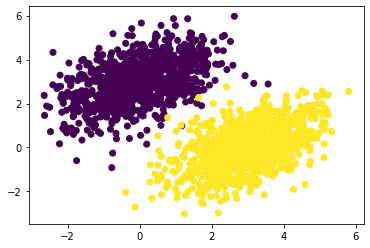

In [52]:
# plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(input[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [37]:
# Creating the linear classification variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))

In [43]:
# Forward propagation
def model(inputs):
    return tf.matmul(inputs, W) + b

In [44]:
# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [47]:
# training step
learning_rate = 0.1

def training_step(inputs, target):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # update variables
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [53]:
# Batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss: .4f}")

Loss at step 0:  2.9423
Loss at step 1:  0.4010
Loss at step 2:  0.1618
Loss at step 3:  0.1276
Loss at step 4:  0.1163
Loss at step 5:  0.1081
Loss at step 6:  0.1009
Loss at step 7:  0.0943
Loss at step 8:  0.0883
Loss at step 9:  0.0829
Loss at step 10:  0.0779
Loss at step 11:  0.0733
Loss at step 12:  0.0692
Loss at step 13:  0.0654
Loss at step 14:  0.0619
Loss at step 15:  0.0587
Loss at step 16:  0.0558
Loss at step 17:  0.0532
Loss at step 18:  0.0508
Loss at step 19:  0.0486
Loss at step 20:  0.0466
Loss at step 21:  0.0448
Loss at step 22:  0.0431
Loss at step 23:  0.0416
Loss at step 24:  0.0402
Loss at step 25:  0.0389
Loss at step 26:  0.0378
Loss at step 27:  0.0367
Loss at step 28:  0.0358
Loss at step 29:  0.0349
Loss at step 30:  0.0341
Loss at step 31:  0.0333
Loss at step 32:  0.0327
Loss at step 33:  0.0321
Loss at step 34:  0.0315
Loss at step 35:  0.0310
Loss at step 36:  0.0305
Loss at step 37:  0.0301
Loss at step 38:  0.0297
Loss at step 39:  0.0294


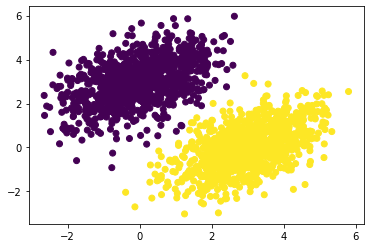

In [54]:
# Predictions on the training inputs
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

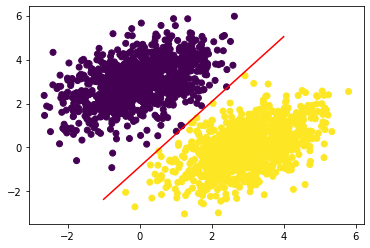

In [56]:
# Plot a line from our model
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5-b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)

From the linear classifier example, it can be seen that our model neatly separate two classes of data from each other.